# mpg (Mile Per Gallon) 데이터 셋

* mpg 데이터 셋을 로드하고 탐색.
* mpg ~ displacement scatter plot
* 2x2 subplot을 생성. scatter plot.
    * mpg ~ cylinders
    * mpg ~ horsepower
    * mpg ~ weight
    * mpg ~ acceleration
* cylinders별 mpg 평균 막대 그래프
* cylinders별 mpg box plot
* origin별, cylinders별 mpg box plot
* origin별, cylinders별 mpg 평균 막대 그래프

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg = sns.load_dataset('mpg')

# 데이터 탐색

In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


mpg DataFrame

* mpg: 연비
* cylinders: 엔진의 실린더 개수
* displacement: 배기량
* horsepower: 마력(힘의 단위)
* weight: 무게
* acceleration: 가속도(순식간에 빠르게 가속할 수 있는 정도?)
* model_year: 생산 연도
* origin: 생산지
* name: 자동차 이름

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [17]:
mpg.describe()  # 숫자 타입 변수들의 기술 통계량

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [18]:
mpg.origin.value_counts()  # 카테고리 타입 변수의 빈도수

usa       249
japan      79
europe     70
Name: origin, dtype: int64

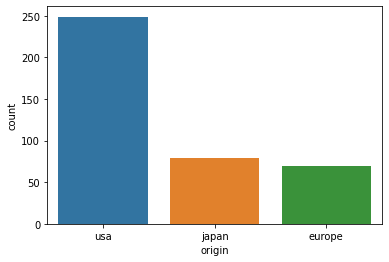

In [25]:
sns.countplot(data=mpg, x='origin')
plt.show()

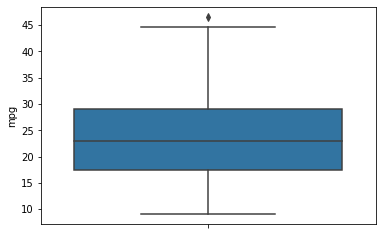

In [27]:
# mpg 컬럼의 box plot
sns.boxplot(data=mpg, y='mpg')
plt.show()

In [28]:
len(mpg.name.unique())

305

# 연비에 영향을 미치는 변수

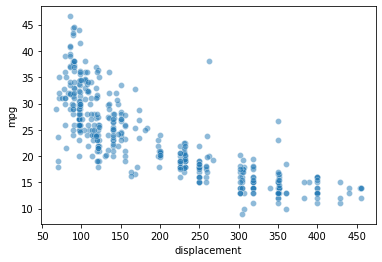

In [29]:
# mpg ~ displacement scatter plot
sns.scatterplot(data=mpg, x='displacement', y='mpg', alpha=0.5)
plt.show()

In [39]:
# displacement가 높은 자동차 중 유독 mpg가 높은 저 튀는 점(자동차) 뭔지 찾아 보기
a = mpg[(mpg.displacement > 250) & (mpg.mpg == mpg[mpg.displacement > 250].mpg.max())]
a

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


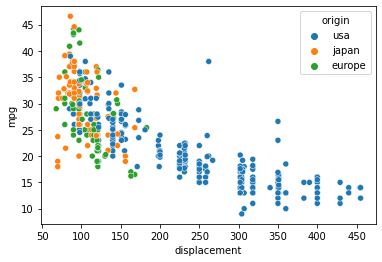

In [30]:
# mpg ~ displacement + origin (색깔)
sns.scatterplot(data=mpg, x='displacement', hue='origin', y='mpg')
plt.show()

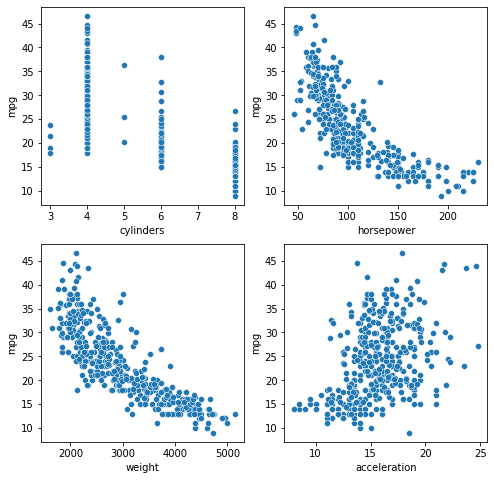

In [7]:
# 2x2 subplot을 생성. scatter plot.
# mpg ~ cylinders,  mpg ~ horsepower,  mpg ~ weight,  mpg ~ acceleration

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=ax[0,0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=ax[0,1])
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=ax[1,0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=ax[1,1])
plt.show()

In [40]:
# cylinders별 mpg 평균 막대 그래프
mpg.groupby('cylinders').mpg.mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

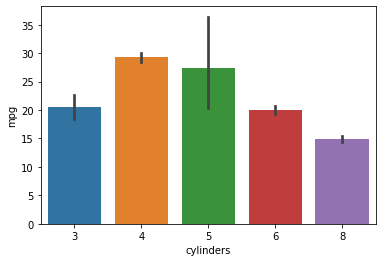

In [9]:
sns.barplot(data=mpg, x='cylinders', y='mpg')   # estimator = np.mean (기본값)
plt.show()

In [10]:
# cylinders별 mpg box plot
mpg.groupby('cylinders').mpg.describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


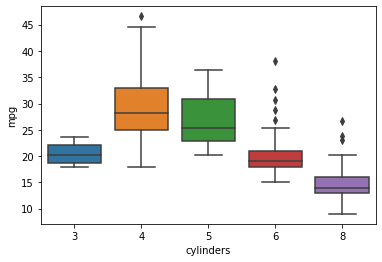

In [11]:
sns.boxplot(data=mpg, x='cylinders', y='mpg')
plt.show()

In [12]:
# origin별, cylinders별 mpg box plot
mpg.groupby(['origin','cylinders']).mpg.describe()

count       mean       std   min     25%    50%     75%  \
origin cylinders                                                            
europe 4           63.0  28.411111  6.442503  18.0  24.000  27.00  30.750   
       5            3.0  27.366667  8.228204  20.3  22.850  25.40  30.900   
       6            4.0  20.100000  7.074367  16.2  16.425  16.75  20.425   
japan  3            4.0  20.550000  2.564501  18.0  18.750  20.25  22.050   
       4           69.0  31.595652  5.435787  20.0  27.500  32.00  35.000   
       6            6.0  23.883333  4.951936  19.0  20.500  23.10  25.100   
usa    4           72.0  27.840278  4.549560  19.0  24.875  27.00  30.600   
       6           74.0  19.663514  3.374992  15.0  18.000  19.00  20.950   
       8          103.0  14.963107  2.836284   9.0  13.000  14.00  16.000   

                   max  
origin cylinders        
europe 4          44.3  
       5          36.4  
       6          30.7  
japan  3          23.7  
       4          46.6  
       6          32.7  
usa    4          39.0  
       6          38.0  
       8          26.6

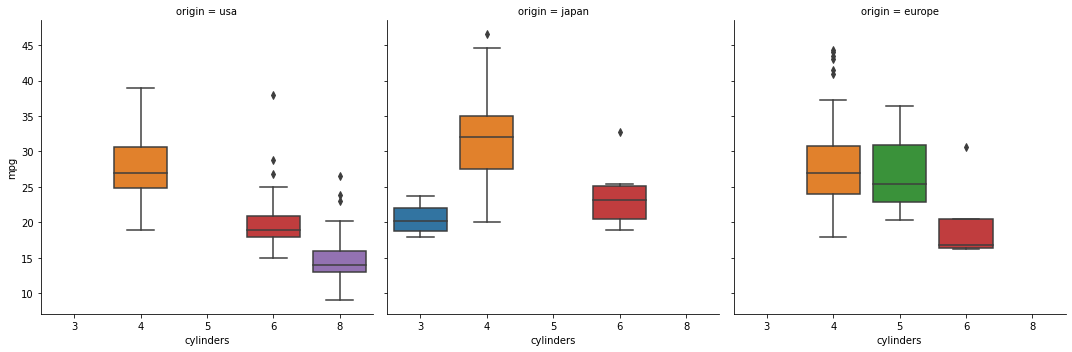

In [13]:
sns.catplot(data=mpg, x='cylinders', col='origin', y='mpg', kind='box')
plt.show()

In [14]:
# origin별, cylinders별 mpg 평균 막대 그래프
mpg.groupby(['origin','cylinders']).mpg.mean()

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

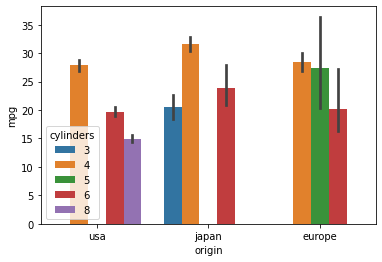

In [15]:
sns.barplot(data=mpg, x='origin', hue='cylinders', y='mpg')
plt.show()

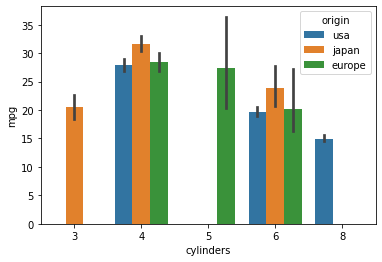

In [41]:
sns.barplot(data=mpg, x='cylinders', hue='origin', y='mpg')
plt.show()

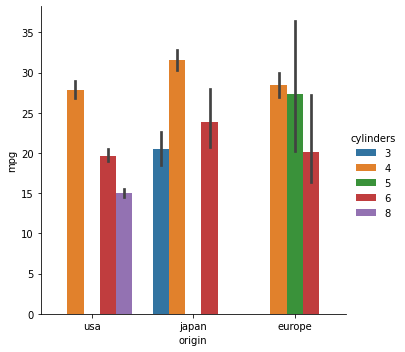

In [16]:
sns.catplot(data=mpg, x='origin', hue='cylinders', y='mpg', kind='bar')
plt.show()

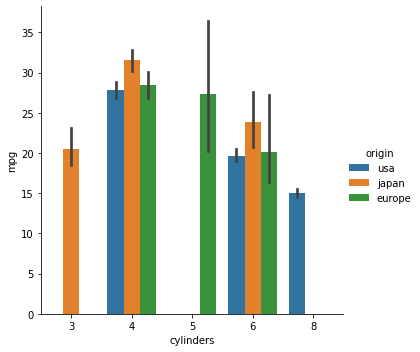

In [42]:
sns.catplot(data=mpg, x='cylinders', hue='origin', y='mpg', kind='bar')
plt.show()